## Assignments

To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below
1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

1. First, load the dataset from the weatherinszeged table from Thinkful's database.
2. Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.
3. Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

As in earlier assignments, be sure to close the database connection after initially pulling in your data.
2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

    Load the houseprices data from Thinkful's database.
    Reimplement the model you built in the previous checkpoint.
    Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
    be sure to close the database connection after initially pulling in your data.



## Part one: Predicting temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()



In [2]:
weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [4]:
weather_df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [5]:
weather_df.isnull().sum()

date                   0
summary                0
preciptype             0
temperature            0
apparenttemperature    0
humidity               0
windspeed              0
windbearing            0
visibility             0
loudcover              0
pressure               0
dailysummary           0
dtype: int64

In [6]:
total_missing = weather_df.isnull().sum().sort_values(ascending=False)
percent_missing = (weather_df.isnull().sum()/weather_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
dailysummary,0,0.000
pressure,0,0.000
loudcover,0,0.000
visibility,0,0.000
windbearing,0,0.000
windspeed,0,0.000
humidity,0,0.000
apparenttemperature,0,0.000
temperature,0,0.000
preciptype,0,0.000


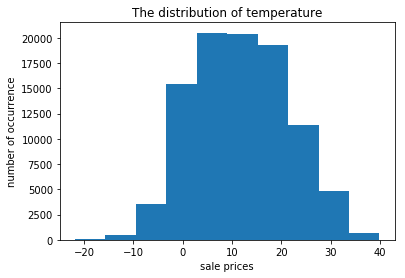

In [7]:
plt.hist(weather_df.temperature)
plt.title('The distribution of temperature')
plt.xlabel('sale prices')
plt.ylabel('number of occurrence')
plt.show()

Temperature is normally distributed. 

In [8]:
weather_num_df = weather_df.select_dtypes(include=[np.number])
weather_num_df.head()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
0,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130
1,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630
2,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940
3,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410
4,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510


In [9]:
weather_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dtypes: float64(8)
memory usage: 5.9 MB


In [ ]:
#look at correlation of each potential numeric feature with target
np.abs(weather_num_df.iloc[:,0:].corr().loc[:,'temperature']).sort_values(ascending=False)

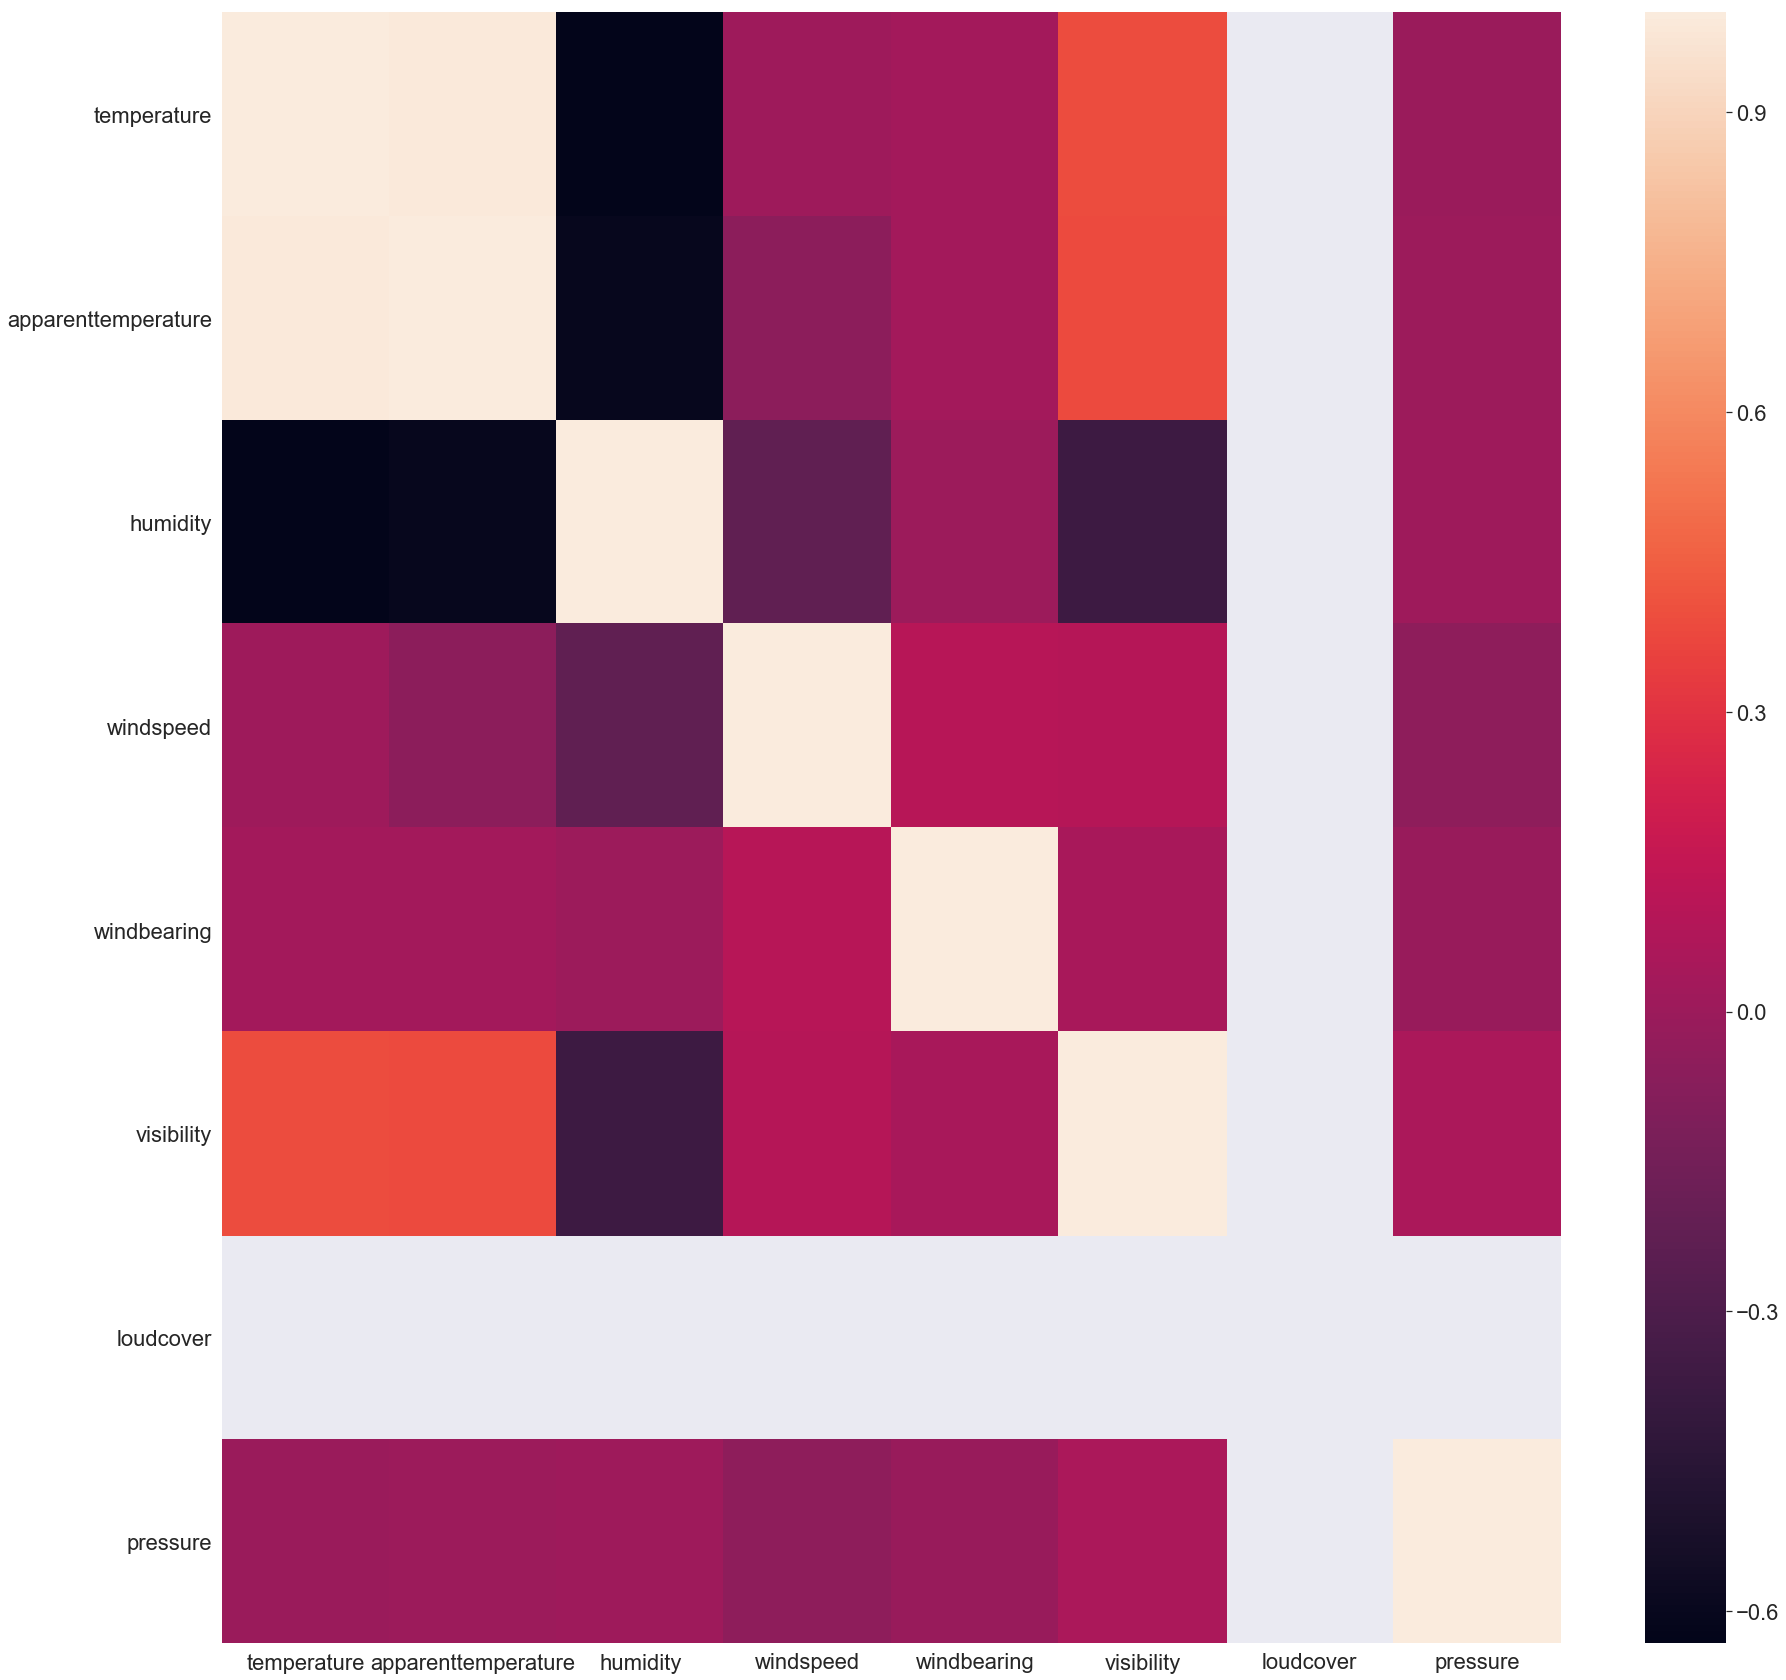

In [10]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(weather_num_df.corr())

High correlation between temperature and apparenttemperature & humidity. The remaining variables have much lower correlation values. Per instructions, will use humidity, windspeed, windbearing, and pressure as explanatory variables.

##### Build a regression model 
where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [11]:
# Y is the target variable
Y = weather_df['temperature']
# X is the feature set which includes
X = weather_df[['humidity','windspeed', 'windbearing', 'pressure']]

# create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)
print('\nR^2 score: \n', lrm.score(X,Y))


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.9264381852854

R^2 score: 
 0.4205778630374367


In [12]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)

results = sm.OLS(Y, X_constant).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:45:34   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### check if your model meets the Gauss-Markov Conditions .
If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### Assumption one: linearity of the model in its coefficients

In [ ]:
#https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, Y):
#Function for visually inspecting the assumption of linearity in a linear regression model.
#It plots observed vs. predicted values and residuals vs. predicted values.
#Args: model - fitted OLS model from statsmodels; y - observed values
    
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=Y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, Y)    

From: https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0 Observing a ‘bowed’ pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions. When the model contains many features, nonlinearity can also be revealed by systematic patterns in plots of the residuals vs. individual features.

The inspection of the plots shows that the linearity assumption is not satisfied.

Potential solutions:

*non-linear transformations to dependent/independent variables
*adding extra features which are a transformation of the already used ones (for example squared version)
*adding features that were not considered before

In [14]:
#example from module; currently doesn't work 
# equation: Y = 1 + 2*X + 3*X^2
X = weather_df[['humidity','windspeed', 'windbearing', 'pressure']]
X_sq = X**2
Y = 1 + 2*X + 3*X_sq

# fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit([X, X_sq], [Y])

# predictions of the linear regression
predictions = lrm_example.predict([X,X_sq])

# print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(X, predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

ValueError: cannot copy sequence with size 96453 to array axis with dimension 4

#### Assumption two: the error term should be zero on average

In [ ]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

#### Assumption three: homoscedasticity

In [ ]:
predictions = lrm.predict(X)
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

The null hypothesis for both tests is that the errors are homoscedastic.

The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

Possible causes for heteroscedasticity: outliers in the data, omitted variables that are important in explaining the variance of the target variable. Dealing with outliers and including relevant variables help to fix (transforming dependent variable [Box Cox or log transformation] & adding features that target the poorly-estimated areas).


#### Assumption four: low multicollinearity
detect multicollinearity, we can simply look at the correlation matrix of the features. Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

In [ ]:
features_df = weather_df[['humidity','windspeed', 'windbearing', 'pressure']]

In [ ]:
#run corr of features only, not against target
np.abs(features_df.iloc[:,0:].corr())

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(features_df.corr())

#### Assumption five: error terms should be uncorrelated with one another

In [ ]:
plt.plot(errors)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption six: features shouldn't be correlated with the errors

In [ ]:
#??? cannot follow example from module to apply to this data set
#not sure what to put in place of rand_nums
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The null hypothesis of both tests is that the errors are normally distributed. The p-values of both tests indicate that our errors are not normally distributed.

##### Part 2: House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

1. Load the houseprices data from Thinkful's database.
2. Reimplement the model you built in the previous checkpoint.
3. Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()



In [ ]:
houseprices_df.head()

In [ ]:
houseprices_df.info()

In [ ]:
houseprices_df.describe()

In [ ]:
total_missing = houseprices_df.isnull().sum().sort_values(ascending=False)
percent_missing = (houseprices_df.isnull().sum()/houseprices_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
plt.hist(houseprices_df.saleprice)
plt.title('The distribution of house sale price')
plt.xlabel('sale price')
plt.ylabel('number of occurrence')
plt.show()

Looking at numeric features first

In [ ]:
numerics_df = houseprices_df.select_dtypes(include=[np.number])
numerics_df.head()

In [ ]:
numerics_df.info()

In [ ]:
#look at correlation of each potential numeric feature with target
np.abs(numerics_df.iloc[:,1:].corr().loc[:,'saleprice']).sort_values(ascending=False)

Choosing only variables with corr >0.5
overallqual     0.791
grlivarea       0.709
garagecars      0.640
garagearea      0.623
totalbsmtsf     0.614
firstflrsf      0.606
fullbath        0.561
totrmsabvgrd    0.534
yearbuilt       0.523
yearremodadd    0.507

In [ ]:
#potential features from numeric columns: 
num_features = ['overallqual', 'grlivarea', 'garagecars', 
                'garagearea', 'totalbsmtsf', 'firstflrsf', 
                'fullbath', 'totrmsabvgrd', 'yearbuilt',
                'yearremodadd']

In [ ]:
houseprices_df[num_features].isnull().sum()

Looking at non-numeric variables

In [ ]:
objects_df = houseprices_df.select_dtypes(include=[np.object])
objects_df.head()

In [ ]:
objects_df.info()

In [ ]:
non_numeric_columns = houseprices_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

In [ ]:
#to plot all non-numeric columns, from sample
for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(houseprices_df.groupby(column)['saleprice'].mean().index, houseprices_df.groupby(column)['saleprice'].mean(),
            color=('red','blue'))
    plt.title('Average saleprice related to {}'.format(column))
    plt.ylabel('Average sale price')
    plt.xlabel(column)
    plt.xticks(rotation='vertical')
    
    plt.tight_layout()
    plt.show()

###### categorical values = 
'neighborhood', string values (20)
#this is probably important
'bsmtcond', string values (6)
'heatingqc', string values (5)
'centralair', string, yes/no
'kitchenqual', string values (5)
'paveddrive', string values (3)

In [ ]:
houseprices_df['central_air_ohc'] = pd.get_dummies(houseprices_df.centralair, drop_first=True)

In [ ]:
mszoning_ohc_df = pd.get_dummies(houseprices_df.mszoning, prefix = 'mszoning', drop_first=True)
mszoning_ohc_df.head()

In [ ]:
kitchenqual_ohc_df = pd.get_dummies(houseprices_df.kitchenqual, prefix = 'kitchenqual',drop_first=True)
kitchenqual_ohc_df.head()

In [ ]:
houseprices_df = pd.concat([houseprices_df, kitchenqual_ohc_df], axis=1)
houseprices_df.head()

In [ ]:
houseprices_df = pd.concat([houseprices_df, mszoning_ohc_df], axis=1)
houseprices_df.head()

In [ ]:
numerics_df = houseprices_df.select_dtypes(include=[np.number])
numerics_df.head()

In [ ]:
np.abs(numerics_df.iloc[:,1:].corr().loc[:,'saleprice']).sort_values(ascending=False)

Choosing only features with corr >0.5
overallqual        0.790982
grlivarea          0.708624
garagecars         0.640409
garagearea         0.623431
totalbsmtsf        0.613581
firstflrsf         0.605852
fullbath           0.560664
totrmsabvgrd       0.533723
yearbuilt          0.522897
TA                 0.519298
kitchenqual_TA     0.519298
yearremodadd       0.507101

In [ ]:
features = ['overallqual', 'grlivarea', 'garagecars',
            'garagearea', 'totalbsmtsf', 'firstflrsf', 
            'fullbath', 'totrmsabvgrd', 'yearbuilt',
            'yearremodadd', 'kitchenqual_TA']

In [ ]:
houseprices_df[features].isnull().sum()

###### fit model
Y = houseprices_df['saleprice']
X is the feature set: houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt',
'yearremodadd', 'kitchenqual_TA']]


In [ ]:
# Y is the target variable
Y = houseprices_df['saleprice']
# X is the feature set 
X = houseprices_df[['overallqual', 'grlivarea', 'garagecars',
            'garagearea', 'totalbsmtsf', 'firstflrsf', 
            'fullbath', 'totrmsabvgrd', 'yearbuilt',
            'yearremodadd', 'kitchenqual_TA']]

# create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

In [ ]:
import statsmodels.api as sm

# need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

###### Assumption one: linearity of the model in its coefficients

Y = houseprices_df['saleprice']
X is the feature set: houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt',
'yearremodadd', 'kitchenqual_TA']]

X = sm.add_constant(X)

In [ ]:
#currently doesn't work
# equation: Y = 1 + 2*X + 3*X^2

houseprices_df['X'] = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt',
'yearremodadd', 'kitchenqual_TA']]
houseprices_df['X_sq'] = houseprices_df['X']**2
houseprices_df['Y'] = 1 + 2*houseprices_df['X'] + 3*houseprices_df['X_sq']

# fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(houseprices_df[[X, X_sq]], houseprices_df[[Y]])

# predictions of the linear regression
predictions = lrm_example.predict(houseprices_df[[X,X_sq]])

# print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(houseprices_df['X'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

###### Assumption two: the error term should be zero on average

In [ ]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

###### Assumption three: homoscedasticity

In [ ]:
predictions = lrm.predict(X)
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
predictions = lrm.predict(X)
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

###### Assumption four: low multicollinearity

In [ ]:
#run corr of features only, not against target
np.abs(weather_df[numerics].iloc[:,1:].corr().loc[:,'temperature']).sort_values(ascending=False)

###### Assumption five: error terms should be uncorrelated with one another

In [ ]:
plt.plot(errors)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

###### Assumption six: features shouldn't be correlated with the errors

In [ ]:
#???
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))